<a href="https://colab.research.google.com/github/anshupandey/Generative-Adversial-Networks/blob/master/Image_Generation_with_pretrained_GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade tensorflow_hub --quiet

In [45]:
import tensorflow_hub as hub
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Image Generation using ProGAN

ProGAN, or Progressive Growing of GANs, is a technique that enhances the generation of high-resolution images through a novel training methodology. Key features include:

- Progressive Training: Starts with low-resolution images and incrementally adds layers to increase the resolution.
- Improved Quality and Stability: Produces higher-quality images with better stability during training.

- Efficiency: Accelerates the training process by focusing on easier tasks first, gradually increasing complexity.

This approach enables the creation of detailed and realistic images by progressively refining them, addressing common challenges in GAN training such as instability and mode collapse.


Paper: https://arxiv.org/pdf/1710.10196.pdf

Refrence: https://www.tensorflow.org/hub/tutorials/tf_hub_generative_image_module

In [46]:
progan = hub.load("https://tfhub.dev/google/progan-128/1").signatures['default']
latent_dim = 512
tf.random.set_seed(42)
initial_vector = tf.random.normal([1, latent_dim])

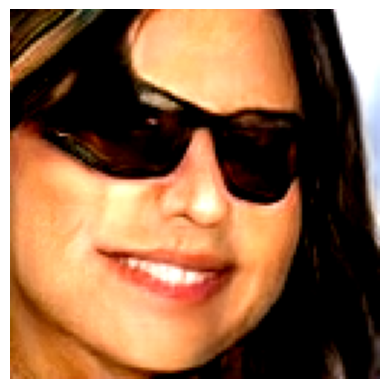

In [47]:
op = progan(initial_vector)['default'][0]
plt.imshow(op)
plt.axis(False)
plt.show()

# Image Super Resolution using ESRGAN

SRGAN, or Super-Resolution Generative Adversarial Network, is designed to generate high-resolution images from low-resolution inputs. It employs a deep neural network with a generative adversarial network (GAN) framework.


The generator model upscales the input image, aiming to reconstruct a high-resolution version that is as close to the original image as possible, while the discriminator model tries to distinguish between the super-resolved (generated) images and original high-resolution images.

Key features include the use of perceptual loss, which focuses not just on pixel accuracy but also on maintaining textures and patterns that are closer to natural images, enhancing the quality of the upscaled images.

Paper: https://arxiv.org/pdf/1809.00219.pdf
Reference: https://www.tensorflow.org/hub/tutorials/image_enhancing

Original Image :   (120, 125, 3)


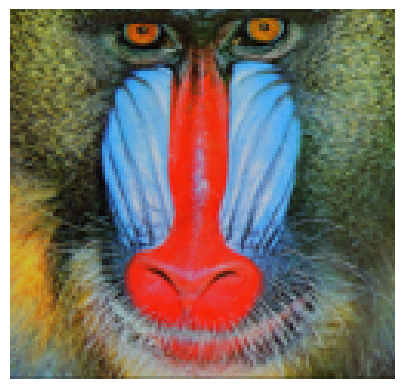

In [58]:
!wget -q "https://user-images.githubusercontent.com/12981474/40157448-eff91f06-5953-11e8-9a37-f6b5693fa03f.png" -O original.png
img = plt.imread("original.png")
print("Original Image :  ",img.shape)
plt.imshow(img)
plt.axis(False)
plt.show()

In [49]:
model = hub.load("https://tfhub.dev/captain-pool/esrgan-tf2/1")
img = img.astype('float32')
sr_image = model(img.reshape((1,)+img.shape))[0]
#sr_image = tf.squeeze(sr_image)

Super Resolution Image :   (480, 500, 3)


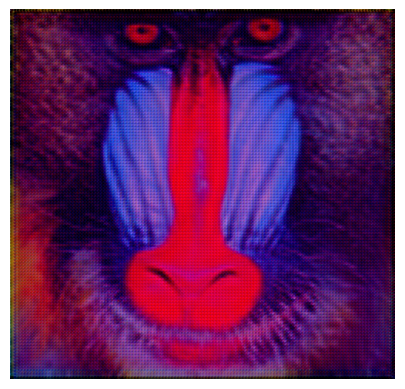

In [59]:
print("Super Resolution Image :  ",sr_image[0].shape)
plt.imshow(sr_image[0])
plt.axis(False)
plt.show()